# Exploring Non-Linear Dynamics with Python

In [8]:
#Import all the packages
import numpy as np
import scipy as sp
import scipy.spatial as spatial
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.signal import detrend
import scipy.stats as st
import math as m
import matplotlib.pyplot as plt

%pylab inline 

#pylab.rcParams['figure.figsize'] = (12.0, 10.0) #Set default figure size

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


We have a network described by:

$\frac{ds_1}{dt} = k_0-k_1(1+(\frac{s_2}{K})^{n})s_1$

$\frac{ds_2}{dt} = k_1(1+(\frac{s_2}{K})^{n})s_1-k_2s_2$

Where $S_2$ stimulates its own production cooperatively.

In chemical kinetec systems this is called autocatalysis.

In [7]:
pylab.rcParams['figure.figsize'] = (12.0, 10.0)
#Define Parameters globally
K = 1 # units concentration
k0 = 8 # concentration/time
k1 = 1 # 1/time
k2 = 5 # 1/time
n = 2 # unitless

def cat(state, t):
    
    #unpack the state variables
    s1 = state[0]
    s2 = state[1]
    
    #define system of equations
    ds1 = k0 - k1*(1+(s2/K)**n)*s1
    ds2 = k1*(1+(s2/K)**n)*s1 - k2*s2
    
    return(ds1, ds2)

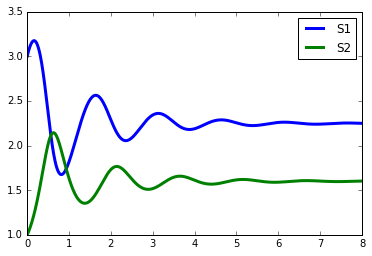

In [9]:
# Set initial conditions
state0 = [3, 1]  #[s1, s2]

# Set number of time points to be evaluated 
t = np.linspace(0, 8, 1000)

# run the integration
state = sp.integrate.odeint(cat, state0, t)

plt.plot(t, state, linewidth = 3)

legend(('S1', 'S2'))

Now we want to graph the some trajectories.  So lets pick some initial conditions and plot them in $S_1$ X $S_2$ space

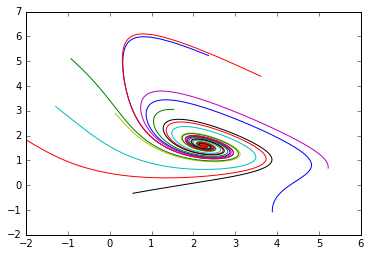

In [11]:
#Set initial conditions
in_cond = [[0,0],[0,2],[0,4],[2,0],[4,0],[4,2]]

#Or pick initial conditions randomly from a uniform distribution
in_cond = -2 + 8*np.random.random((10,2))

all_states = []
for i in in_cond:
    temp_state = odeint(cat, i, t)
    all_states.append(temp_state)
    
for i in all_states:
    plt.plot(i[:,0], i[:,1])


We can also take a look at all individual trajectories and note that they all collapse to the same steady state $(s_1*,s_2*)$

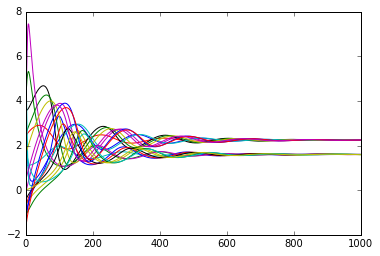

In [17]:
for i in all_states:
    plt.plot(i)

Now we can plot the phase diagram

[array([[ 0.        ,  0.21052632,  0.42105263,  0.63157895,  0.84210526,
         1.05263158,  1.26315789,  1.47368421,  1.68421053,  1.89473684,
         2.10526316,  2.31578947,  2.52631579,  2.73684211,  2.94736842,
         3.15789474,  3.36842105,  3.57894737,  3.78947368,  4.        ],
       [ 0.        ,  0.21052632,  0.42105263,  0.63157895,  0.84210526,
         1.05263158,  1.26315789,  1.47368421,  1.68421053,  1.89473684,
         2.10526316,  2.31578947,  2.52631579,  2.73684211,  2.94736842,
         3.15789474,  3.36842105,  3.57894737,  3.78947368,  4.        ],
       [ 0.        ,  0.21052632,  0.42105263,  0.63157895,  0.84210526,
         1.05263158,  1.26315789,  1.47368421,  1.68421053,  1.89473684,
         2.10526316,  2.31578947,  2.52631579,  2.73684211,  2.94736842,
         3.15789474,  3.36842105,  3.57894737,  3.78947368,  4.        ],
       [ 0.        ,  0.21052632,  0.42105263,  0.63157895,  0.84210526,
         1.05263158,  1.26315789,  1.47368421, 

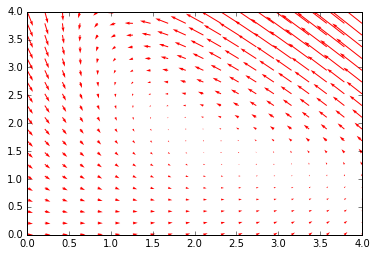

In [21]:
#Make ranges for meshgrid
s1 = np.linspace(0, 4, 20)
s2 = np.linspace(0, 4, 20)

S1, S2 = np.meshgrid(s1, s2)

u, v = np.zeros(S1.shape), np.zeros(S2.shape)

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = S2[i, j]
        S_prime = cat([x, y], [])
        u[i,j] = S_prime[0]
        v[i,j] = S_prime[1]
     

Q = plt.quiver(S1, S2, u, v, color='r')
print(np.meshgrid(s1,s2))

We can now plot the nullclines to understand the invariant trajectories in both dimensions.   
In order to do this we must solve the differential equations with $\frac{ds_1}{dt} = 0$ and $\frac{ds_2}{dt} = 0$.

The $s_1$ nullcline is 

$s_1 = \frac{k_0}{k_1(1+(\frac{s_2}{K})^n}$

and the $s_2$ nullcline is 

$s_2 = \frac{k_1(1+(\frac{s_2}{K})^n}{k_2}$

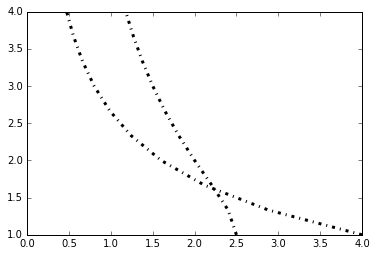

In [18]:
def s1_nullcline(s2):
    s1_null = k0/(k1*(1+(s2/K)**n))
    return(s1_null)

def s2_nullcline(s2):
    s2_null = k2*s2/(k1*(1+(s2/K)**n))
    return(s2_null)
    
plt.plot(s1_nullcline(s2), s2, linewidth=3, linestyle = '-.', color = 'k')
plt.plot(s2_nullcline(s2),s2 , linewidth=3, linestyle = '-.', color = 'k')

Now let's put it all together to have a complete picture of the system.

(0, 4)

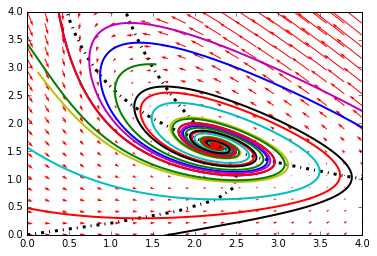

In [22]:
plt.plot(s1_nullcline(s2), s2, linewidth=3, linestyle = '-.', color = 'k')
plt.plot(s2_nullcline(s2),s2 , linewidth=3, linestyle = '-.', color = 'k')
Q = plt.quiver(S1, S2, u, v, color='r')
for i in all_states:
    plt.plot(i[:,0], i[:,1], linewidth=2)
plt.xlim(0, 4)
plt.ylim(0, 4)

Now lets raise the hill coefficient to increase the non-linearity.

(0, 4)

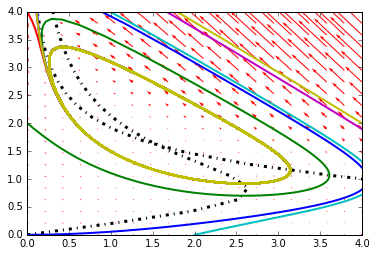

In [39]:
n = 3
t = np.linspace(0, 100, 10000)

in_cond = [[0,0],[0,2],[0,4],[2,0],[4,0],[4,2]]

# Trajectories
all_states = []
for i in in_cond:
    temp_state = odeint(cat, i, t)
    all_states.append(temp_state)


#Phase plane
for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = S2[i, j]
        S_prime = cat([x, y], t)
        u[i,j] = S_prime[0]
        v[i,j] = S_prime[1]
        

plt.plot(s1_nullcline(s2), s2, linewidth=3, linestyle = '-.', color = 'k')
plt.plot(s2_nullcline(s2),s2 , linewidth=3, linestyle = '-.', color = 'k')
Q = plt.quiver(S1, S2, u, v, color='r')
for i in all_states:
    plt.plot(i[:,0], i[:,1], linewidth=2)
plt.xlim(0, 4)
plt.ylim(0, 4)

Look at a single trajectory to confirm it oscillates forever.

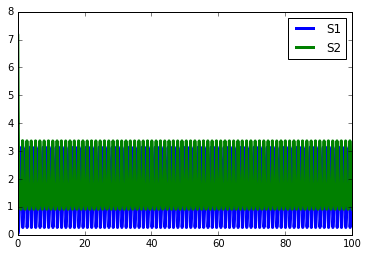

In [41]:
state0 = [4, 4]  #[s1, s2]

state = odeint(cat, state0, t)

plt.plot(t, state, linewidth = 3)

legend(('S1', 'S2'))

At high nonlinearities trajectories that begin inside of the limit cycle spiral out to join it, showing that its stable. Lets plot onw trajectory that begins outside the limit cycle and one that begins inside of the limit cycle.

(0, 4)

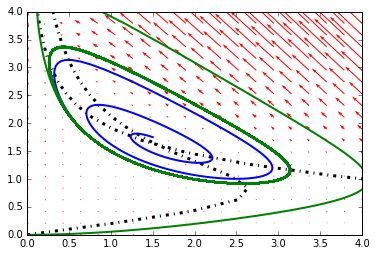

In [42]:
n = 3
t = np.linspace(0, 1000, 100000)

# Trajectories
in_cond = [[1.5,1.75],[0,0]]
all_states = []
for i in in_cond:
    temp_state = odeint(cat, i, t)
    all_states.append(temp_state)


#Phase plane
for i in range(NI):
    for j in range(NJ):
        x = S1[i, j]
        y = S2[i, j]
        S_prime = cat([x, y], t)
        u[i,j] = S_prime[0]
        v[i,j] = S_prime[1]
        

plt.plot(s1_nullcline(s2), s2, linewidth=3, linestyle = '-.', color = 'k')
plt.plot(s2_nullcline(s2),s2 , linewidth=3, linestyle = '-.', color = 'k')
Q = plt.quiver(S1, S2, u, v, color='r')
for i in all_states:
    plt.plot(i[:,0], i[:,1], linewidth=2)
plt.xlim(0, 4)
plt.ylim(0, 4)

### Chaotic Systems in 3D

In [24]:
# Define a bunch of different Chaotic ODE systems

def lorenz(state, t0, sigma=10., beta=8./3, rho=28.0):
    
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = sigma * (y - x)
    dydt =  x * (rho - z) - y
    dzdt = x * y - beta * z
    
    return [dxdt, dydt, dzdt]

def aizawa(state, t0):
    
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = (z - 0.7)*x - 3.5*y
    dydt = 3.5*x + (z-0.7)*y
    dzdt = .6 + .95*z - 1/3*z**3 - (x**2 + y**2)*(1 + 0.25*z) + .1*z*x**3
    
    return [dxdt, dydt, dzdt]


def thomas(state, t0, w=-.19):
    
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = w*x + sin(y)
    dydt = w*y + sin(z)
    dzdt = w*z + sin(x)
    
    return [dxdt, dydt, dzdt]

def rossler(state, t0, a=.2, b=.2, c=5.7):
    
    x = state[0]
    y = state[1]
    z = state[2]
    
    dxdt = -y - z
    dydt = x + a*y
    dzdt = b + z * (x - c)
    
    return [dxdt, dydt, dzdt]


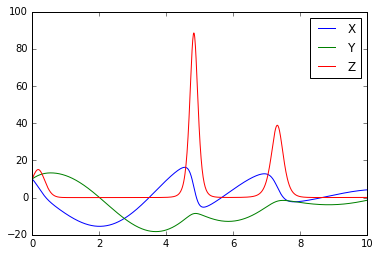

In [30]:
N_trajectories = 20

# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)

x0 =  10 + 0.1*np.random.random((N_trajectories, 3)) #Lorenz
#x0 = 10 + np.random.random((N_trajectories, 3)) #Aizawa
#x0 = -10 + 20*np.random.random((N_trajectories, 3)) #Thomas
#x0 = [-.01,.01,-.01]

# Solve for the trajectories
t = np.linspace(0, 10, 1000)
x_t = np.asarray([sp.integrate.odeint(rossler, x0i, t)
                  for x0i in x0])

plt.plot(t, x_t[0,:,:])

legend(('X', 'Y', 'Z'))


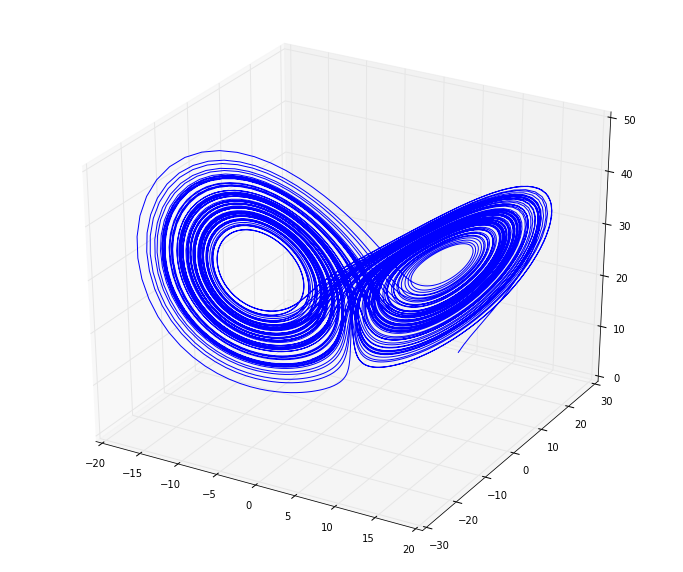

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.plot(x_t[0,:,0], x_t[0,:,1], x_t[0,:,2])


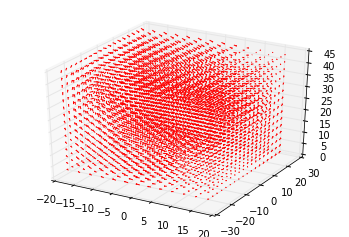

In [27]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

xD = np.arange(np.amin(x_t[:,:,0]), np.amax(x_t[:,:,0]), 3)
yD = np.arange(np.amin(x_t[:,:,1]), np.amax(x_t[:,:,1]), 3)
zD = np.arange(np.amin(x_t[:,:,2]), np.amax(x_t[:,:,2]), 3)

X, Y, Z = np.meshgrid(xD, yD, zD)

Ni, Nj, Nk = X.shape

u, v, w = np.zeros(X.shape), np.zeros(Y.shape), np.zeros(Z.shape)

for i in range(Ni):
    for j in range(Nj):
        for k in range(Nk):
            x = X[i, j, k]
            y = Y[i, j, k]
            z = Z[i, j, k]
            
            S_prime = lorenz([x,y,z],[])

            u[i, j, k] = S_prime[0]
            v[i, j, k] = S_prime[1]
            w[i, j, k] = S_prime[2]
            

ax.quiver(X, Y, Z, u, v, w, length=1, color='r')

plt.show()

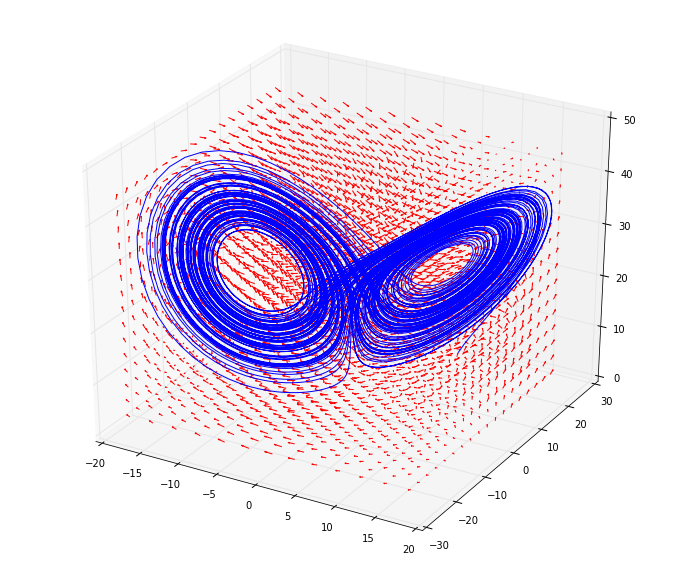

In [39]:
fig = plt.figure()
ax = fig.gca(projection='3d')
Q = ax.quiver(X, Y, Z, u, v, w, length=1, color='r')
plt.plot(x_t[0,:,0], x_t[0,:,1], x_t[0,:,2])
plt.show()

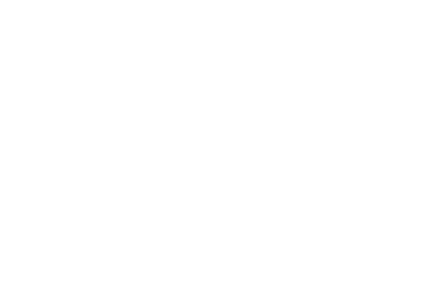

In [31]:
#This section was modified from https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/
from matplotlib.colors import cnames
from matplotlib import animation

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')

# choose a different color for each trajectory
colors = plt.cm.prism(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = [ax.plot([], [], [], '-', c=c)[0]
            for c in colors]
pts = [ax.plot([], [], [], 'o', c=c)[0]
            for c in colors]

# prepare the axes limits
ax.set_xlim((np.amin(x_t[:,:,0]), np.amax(x_t[:,:,0])))
ax.set_ylim((np.amin(x_t[:,:,1]), np.amax(x_t[:,:,1])))
ax.set_zlim((np.amin(x_t[:,:,2]), np.amax(x_t[:,:,2])))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i) # set viewpoint, making it a funciton of i allows for rotation
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=1)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('rossler.mp4', fps=100, extra_args=['-vcodec', 'libx264'])